# 4 Clusters with 2 independent variables (Fare and Age)

## Importing data

Libraries and the data will be imported

In [1223]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
import seaborn as sns
data_raw=pd.read_csv('/content/titanic_numbers.csv')

## Clean the data

The data will be clean preparing for training and modeling

In [1224]:
data_raw

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,1,0,3,"Braund, Mr. Owen Harris",0,22.000000,1,0,7.2500,3,7
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.000000,1,0,71.2833,1,4
2,2,3,1,3,"Heikkinen, Miss. Laina",1,26.000000,0,0,7.9250,3,5
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.000000,1,0,53.1000,3,4
4,4,5,0,3,"Allen, Mr. William Henry",0,35.000000,0,0,8.0500,3,7
...,...,...,...,...,...,...,...,...,...,...,...,...
886,886,887,0,2,"Montvila, Rev. Juozas",0,27.000000,0,0,13.0000,3,2
887,887,888,1,1,"Graham, Miss. Margaret Edith",1,19.000000,0,0,30.0000,3,5
888,888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,21.777778,1,2,23.4500,3,5
889,889,890,1,1,"Behr, Mr. Karl Howell",0,26.000000,0,0,30.0000,1,7


### Selecting the data

Selecting Age and Fare Columns

In [1225]:
X = data_raw.iloc[:,[6,9]].values
print(X)

[[22.          7.25      ]
 [38.         71.2833    ]
 [26.          7.925     ]
 ...
 [21.77777778 23.45      ]
 [26.         30.        ]
 [32.          7.75      ]]


## Elbow Method to find optimal number of clusters

Elbow method is a method to find the optimal number of clusters.

You must choose the numbers of the clusters based in the X axis in the graph, where the line stops to decline.

In this case we chose 4 clusters.

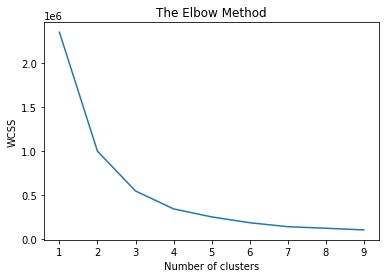

In [1226]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Build the model

Instantiate the object with the name **kmeans** as a model, for the machine learning

**y_kmeans** is a list that contain the numbers referring to the cluster.

In [1227]:
kmeans = KMeans(n_clusters = 4, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(X)
print(y_kmeans)

[1 0 1 ... 1 1 1]


##Visualization

Plotting a graph to visualize better the clusters in different colors

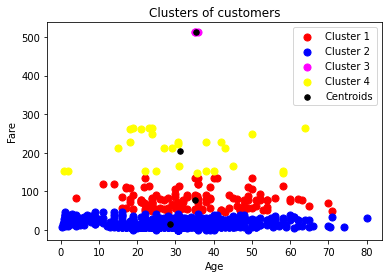

In [1228]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 50, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 50, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 50, c = 'magenta', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 50, c = 'yellow', label = 'Cluster 4')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 30, c = 'black', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Age')
plt.ylabel('Fare')
plt.legend()
plt.show()

###Tests

#### Kruskal

Creating variables for Clusters, Age and Fare

In [1229]:
cluster_1_Age = X[y_kmeans==0,0]
cluster_2_Age = X[y_kmeans==1,0]
cluster_3_Age = X[y_kmeans==2,0]
cluster_4_Age = X[y_kmeans==3,0]
cluster_1_Fare = X[y_kmeans==0,1]
cluster_2_Fare = X[y_kmeans==1,1]
cluster_3_Fare = X[y_kmeans==2,1]
cluster_4_Fare = X[y_kmeans==3,1]


Testing with kruskal all Age variables

In [1230]:
# Age kruskal
t,p= stats.kruskal(cluster_1_Age,cluster_2_Age,cluster_3_Age,cluster_4_Age)

print("Ho = hipotesis null, the clusters do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters do not differ significantly from Age
Ha = alternative hipotesis, the clusters differ significantly from Age
Ho was rejected, they differ significantly, p-value= 1.0013413687718376e-06


Testing with kruskal all Fare variables

In [1231]:
# Fare kruskal
t,p= stats.kruskal(cluster_1_Fare,cluster_2_Fare,cluster_3_Fare,cluster_4_Fare)

print("Ho = hipotesis null, the clusters do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters do not differ significantly from Fare
Ha = alternative hipotesis, the clusters differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 5.115998120444148e-88


####T-test for Age

Testing with T-test for Age in Clusters 1 and 2

In [1232]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_2_Age ) 

print("Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Age
Ho was rejected, they differ significantly, p-value= 4.022335797420962e-08


Testing with T-test for Age in Clusters 1 and 3

In [1233]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_3_Age ) 

print("Ho = hipotesis null, the clusters  1 and 3 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters  1 and 3 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters  1 and 3 do not differ significantly from Age
Ha = alternative hipotesis, the clusters  1 and 3 differ significantly from Age
Ho was not rejected, they do not differ significantly, p-value= 0.9852815528044948


Testing with T-test for Age in Clusters 1 and 4

In [1234]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_1_Age,cluster_4_Age )

print("Ho = hipotesis null, the clusters  1 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters  1 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters  1 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters  1 and 4 differ significantly from Age
Ho was not rejected, they do not differ significantly, p-value= 0.149688677973529


Testing with T-test for Age in Clusters 2 and 3

In [1235]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_2_Age,cluster_3_Age ) 

print("Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Age
Ho was not rejected, they do not differ significantly, p-value= 0.3578148910097535


Testing with T-test for Age in Clusters 2 and 4

In [1236]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_2_Age,cluster_4_Age ) 

print("Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Age
Ho was not rejected, they do not differ significantly, p-value= 0.29197486724260413


Testing with T-test for Age in Clusters 3 and 4

In [1237]:
# Age ttest_ind
t,p= stats.ttest_ind(cluster_3_Age,cluster_4_Age ) 

print("Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Age")
print("Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Age")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Age
Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Age
Ho was not rejected, they do not differ significantly, p-value= 0.6472632246859158


For Age only Clusters 1 and 2 differ significantly

In [1179]:
print("Average Age from cluster 1: ",cluster_1_Age.mean())
print("Average Age from cluster 2: ",cluster_2_Age.mean())
print("Average Age from cluster 3: ",cluster_3_Age.mean())
print("Average Age from cluster 4: ",cluster_4_Age.mean())

Average Age from cluster 1:  35.19371046248603
Average Age from cluster 2:  28.518669575209245
Average Age from cluster 3:  35.333333333333336
Average Age from cluster 4:  31.143433797360007


####T-test for Fare

Testing with T-test for Fare in Clusters 1 and 2

In [1180]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_2_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 2 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 2 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 1.631198581002713e-262


Testing with T-test for Fare in Clusters 1 and 3

In [1181]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_3_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 3 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 3 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 3 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 3 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 6.93073539413848e-66


Testing with T-test for Fare in Clusters 1 and 4

In [1182]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_1_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 1 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 1 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 1 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 1 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 2.854741419333483e-50


Testing with T-test for Fare in Clusters 2 and 3

In [1183]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_2_Fare,cluster_3_Fare ) 

print("Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 3 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 2 and 3 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 0.0


Testing with T-test for Fare in Clusters 2 and 4

In [1184]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_2_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 2 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 2 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 0.0


Testing with T-test for Fare in Clusters 3 and 4

In [1185]:
# Fare ttest_ind
t,p= stats.ttest_ind(cluster_3_Fare,cluster_4_Fare ) 

print("Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Fare")
print("Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Fare")

if (p>0.05):
  print(f"Ho was not rejected, they do not differ significantly, p-value= {p}")
else:
  print(f"Ho was rejected, they differ significantly, p-value= {p}")

Ho = hipotesis null, the clusters 3 and 4 do not differ significantly from Fare
Ha = alternative hipotesis, the clusters 3 and 4 differ significantly from Fare
Ho was rejected, they differ significantly, p-value= 2.2462172403659693e-12


For Fare all clusters differ significantly

In [1186]:
print("Average Fare from cluster 1: ",cluster_1_Fare.mean())
print("Average Fare from cluster 2: ",cluster_2_Fare.mean())
print("Average Fare from cluster 3: ",cluster_3_Fare.mean())
print("Average Fare from cluster 4: ",cluster_4_Fare.mean())

Average Fare from cluster 1:  76.63323999999999
Average Fare from cluster 2:  15.273004827586206
Average Fare from cluster 3:  512.3292
Average Fare from cluster 4:  204.94806428571425


Numbers of items in clusters

In [1187]:
print(len(cluster_1_Age),len(cluster_2_Age),len(cluster_3_Age),len(cluster_4_Age) )

135 725 3 28


###Conclusions

* Age

  For Age only Clusters 1 and 2 differ significantly. Average Age:

  * Cluster 1:  35.19

  * Cluster 2:  28.52

  * Cluster 3:  35.33

  * Cluster 4:  31.14

* Fare

  For Fare all clusters differ significantly. Average Fare:

  * Cluster 1:  76.63

  * Cluster 2:  15.27

  * Cluster 3:  512.33

  * Cluster 4:  204.95

* Numbers of items in clusters:

  * Cluster 1:  135

  * Cluster 2:  725

  * Cluster 3:  3

  * Cluster 4:  28

  Observation: Cluster 3 and 4 could have too few items to make statistical affirmation 

# 2 Clusters with Many independent variables

##Clean the data

The data will be clean preparing for training and modeling

 Dividing embarked categorical places into columns, in another word dummy variables

In [1188]:
# Copying all data
data = data_raw.copy()

# Creating 4 embarked empty columns 
data['Embarked Unknown'] = data.index*0
data['Embarked Cherbourg'] = data.index*0
data['Embarked Queenstown'] = data.index*0
data['Embarked Southampton'] = data.index*0

# Creating variables to store the index of each column to be used in next code block
embarked = data.columns.get_loc("Embarked")
embarked_U = data.columns.get_loc("Embarked Unknown")
embarked_C = data.columns.get_loc("Embarked Cherbourg")
embarked_Q = data.columns.get_loc("Embarked Queenstown")
embarked_S = data.columns.get_loc("Embarked Southampton")

# store the binary data in the dummy variables
for id,row in data.iterrows():
  if data.iloc[id,embarked] == 0:
    data.iloc[id,embarked_U] =1
  elif data.iloc[id,embarked] == 1:
    data.iloc[id,embarked_C] =1
  elif data.iloc[id,embarked] == 2:
    data.iloc[id,embarked_Q] =1
  elif data.iloc[id,embarked] == 3:
    data.iloc[id,embarked_S] =1
  else:
    print("Error")

# Dropping useless columns
data.drop(["Embarked","Embarked Unknown","PassengerId","Unnamed: 0","Name","Survived"], axis=1,inplace=True)

# Data
data

,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked Cherbourg,Embarked Queenstown,Embarked Southampton
0,3,0,22.000000,1,0,7.2500,7,0,0,1
1,1,1,38.000000,1,0,71.2833,4,1,0,0
2,3,1,26.000000,0,0,7.9250,5,0,0,1
3,1,1,35.000000,1,0,53.1000,4,0,0,1
4,3,0,35.000000,0,0,8.0500,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,2,0,0,1
887,1,1,19.000000,0,0,30.0000,5,0,0,1
888,3,1,21.777778,1,2,23.4500,5,0,0,1
889,1,0,26.000000,0,0,30.0000,7,1,0,0


##Elbow Method to find optimal number of clusters

Elbow method is a method to find the optimal number of clusters.

You must choose the numbers of the clusters based in the X axis in the graph, where the line stops to decline.

In this case we are going to choose 2 clusters, because we need 2 groups to analyse in the tests and the logistic regression.

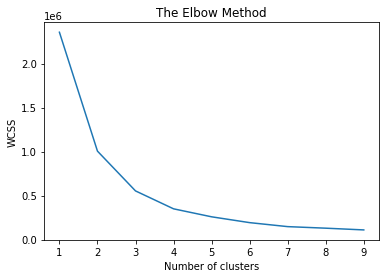

In [1189]:
from sklearn.cluster import KMeans

wcss = []

for i in range(1,10):
  kmeans2 = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans2.fit(data)
  wcss.append(kmeans2.inertia_)
plt.plot(range(1, 10), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

##Modelling

Instantiate the object with the name **kmeans2** as a model, for the machine learning

**y_kmeans2** is a list that contain the numbers referring to the cluster.

In [1190]:
kmeans2 = KMeans(n_clusters = 2, init = 'k-means++', random_state = 0)
y_kmeans2 = kmeans2.fit_predict(data)
print(y_kmeans2)

[1 1 1 ... 1 1 1]


##Tests

Testing if the clusters differ in each column

In [1191]:
# compare each column with each other
for i in range(len(data.columns)):
    
    t,p= stats.kruskal(data[y_kmeans2 == 0].iloc[:,i], data[y_kmeans2 == 1].iloc[:,i])
    if (p>0.05):
      print(f"{data.columns[i]}: Clusters do not differ, p-value = {p}")
    else:
      print(f"{data.columns[i]}: Clusters differ, p-value = {p}")
    print()


Pclass: Clusters differ, p-value = 7.328513606129781e-28

Sex: Clusters differ, p-value = 5.619079457390074e-06

Age: Clusters do not differ, p-value = 0.15780819380404518

SibSp: Clusters differ, p-value = 0.008725877627878034

Parch: Clusters differ, p-value = 9.586085966228977e-08

Fare: Clusters differ, p-value = 2.2935494080779545e-34

Title: Clusters differ, p-value = 7.384611983528155e-05

Embarked Cherbourg: Clusters differ, p-value = 6.046770430490407e-12

Embarked Queenstown: Clusters differ, p-value = 0.02102625832335153

Embarked Southampton: Clusters differ, p-value = 6.049340933051185e-06



##Visualization

Graphs for visualize how the data distribute between the clusters in each column

Function to plot the graphs for Age and Fare

In [1192]:
def hist_norm(column):
  fig , ax = plt.subplots()
  col = data.columns.get_loc(column)

  # getting the data
  series1 = data[y_kmeans2 == 1].iloc[:,col]
  series2 = data[y_kmeans2 == 0].iloc[:,col]

  # plotting
  series1.hist(density=True,edgecolor = 'black', label= 'Cluster 1')
  series2.hist(density=True,edgecolor = 'black',alpha =0.7,label= 'Cluster 2')

  plt.legend()
  ax.set_title(column)
  plt.show()

Fare

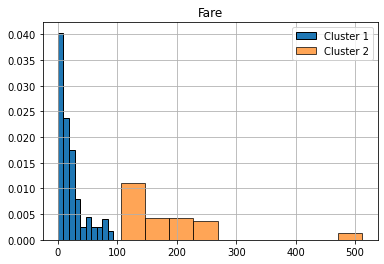

In [1193]:
hist_norm("Fare")

Age

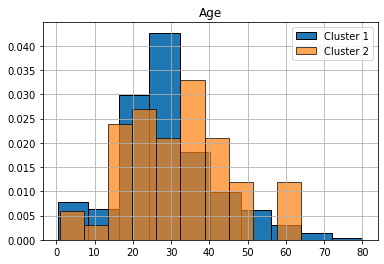

In [1194]:
hist_norm("Age")

Function to plot the graphs for the others columns

In [1195]:
def plot_norm(column):
  fig , ax = plt.subplots()

  # getting the index for the column
  col = data.columns.get_loc(column)

  # We need to ensure that two bar have the same lenght in x

  # it will store and sort all index for the 2 clusters
  series1 = (data[y_kmeans2 == 1].iloc[:,col].value_counts().sort_index())
  series2 = (data[y_kmeans2 == 0].iloc[:,col].value_counts().sort_index())

  # if the index is not in cluster 1 it will create on in cluster 2
  for i in series1.index:
    if i not in series2.index:
      series2.loc[i] = 0 

  # if the index is not in cluster 2 it will create on in cluster 1
  for i in series2.index:
    if i not in series1.index:
      series1.loc[i] = 0 

  # To make the bar standart, the sum of the data will be 1
  series1_norm = series1 / series1.sum()
  series2_norm = series2 / series2.sum()

  # plotting
  x = np.arange(len(series1_norm))
  width = 0.35 
  rects1 = ax.bar(x - width/2, series1_norm, width, label='Cluster 1')
  rects2 = ax.bar(x + width/2, series2_norm, width, label='Cluster 2')

  plt.xlim(-1,len(series1_norm))
  ax.set_title(column)
  plt.legend()
  plt.show()


Pclass

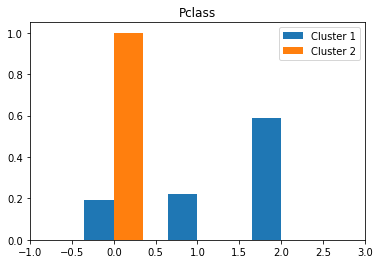

In [1196]:
plot_norm("Pclass")

Sex

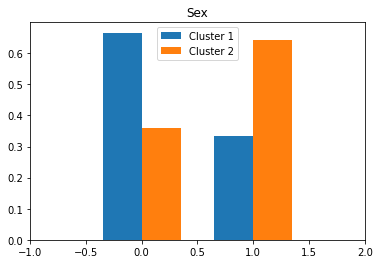

In [1197]:
plot_norm("Sex")

SibSp

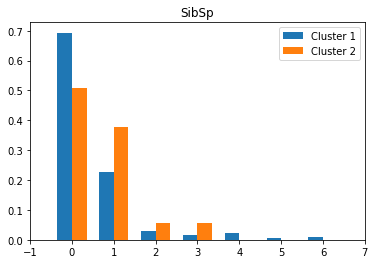

In [1198]:
plot_norm("SibSp")

Parch

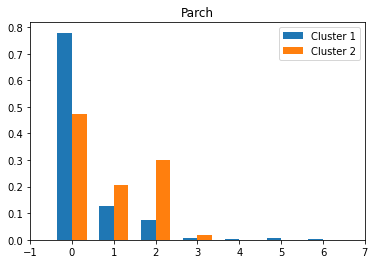

In [1199]:
plot_norm("Parch")

Title

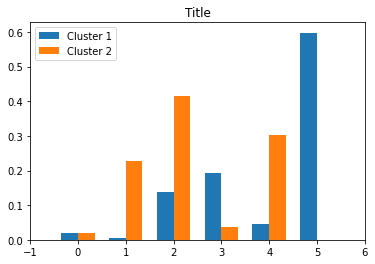

In [1200]:
plot_norm("Title")

Embarked Cherbourg

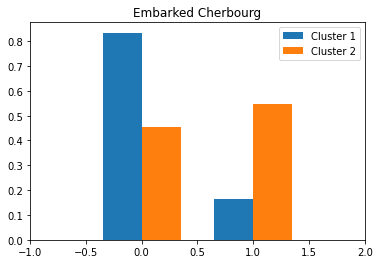

In [1201]:
plot_norm("Embarked Cherbourg")

Embarked Queenstown

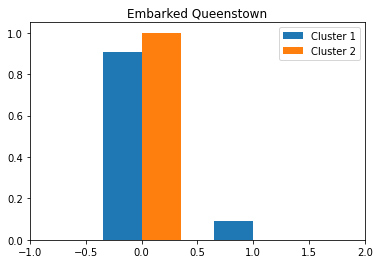

In [1202]:
plot_norm("Embarked Queenstown")

Embarked Southampton

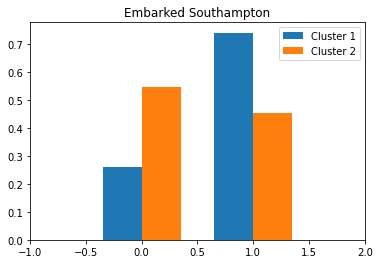

In [1203]:
plot_norm("Embarked Southampton")

##Conclusion

The only situation where the cluster do not differ is from Age:

* Pclass: Clusters differ, p-value = 7.328513606129781e-28

* Sex: Clusters differ, p-value = 5.619079457390074e-06

* Age: Clusters do not differ, p-value = 0.15780819380404518

* SibSp: Clusters differ, p-value = 0.008725877627878034

* Parch: Clusters differ, p-value = 9.586085966228977e-08

* Fare: Clusters differ, p-value = 2.2935494080779545e-34

* Title: Clusters differ, p-value = 7.384611983528155e-05

* Embarked Cherbourg: Clusters differ, p-value = 6.046770430490407e-12

* Embarked Queenstown: Clusters differ, p-value = 0.02102625832335153

* Embarked Southampton: Clusters differ, p-value = 6.049340933051185e-06

#Comparing

**Confusion Matrix:**

True means the predict was right

False means the predict was wrong

Positive means the value predict is 1

Negative means the value predict is 0

With those terms we can make a confusion matrix:

\begin{bmatrix}
True\text{ }Negative & False\text{ }Negative \\
False\text{ }Positive & True\text{ }Positive
\end{bmatrix}

**Accuracy** is the rate between the perdictons right and wrong

In this test the Confusion Matrix will be used this way:

* True Positive: Cluster 1 and Survived 1

* True Negative: Cluster 0 and Survived 0

* False Positive: Cluster 1 and Survived 0 

* False Negative: Cluster 0 and Survived 1

How much is the relationship between Clusters and Survived?

The test gave percentage of correlation: 64.42%

In [1204]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(data_raw.iloc[:,data_raw.columns.get_loc("Survived")],  y_kmeans2)
print('Confusion matrix: ')
print(cm)

print(f'True Positive:{cm[1][1]}  True Negative:{cm[0][0]}  False Positive:{cm[0][1]}  False Negative:{cm[1][0]}')



acc = accuracy_score(data_raw.iloc[:,data_raw.columns.get_loc("Survived")], y_kmeans2)

# acc>50% cluster 2 represents survival, acc<50% cluster 1 represents survival
if acc>0.5:
  print('2° Cluster(y_kmeans2[1]) represents the survival. Percentage of correlation: {:.2%}'.format(acc))
else:
  print('1° Cluster(y_kmeans2[0]) represents the survival. Percentage of correlation: {:.2%}'.format(1-acc))

Confusion matrix: 
[[ 14 535]
 [ 39 303]]
True Positive:303  True Negative:14  False Positive:535  False Negative:39
1° Cluster(y_kmeans2[0]) represents the survival. Percentage of correlation: 64.42%


For Sex

In [1205]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(data_raw.iloc[:,data_raw.columns.get_loc("Sex")],  y_kmeans2)
print('Confusion matrix: ')
print(cm)

print(f'True Positive:{cm[1][1]}  True Negative:{cm[0][0]}  False Positive:{cm[0][1]}  False Negative:{cm[1][0]}')



acc = accuracy_score(data_raw.iloc[:,data_raw.columns.get_loc("Sex")], y_kmeans2)

# acc>50% cluster 2 represents survival, acc<50% cluster 1 represents survival
if acc>0.5:
  print('2° Cluster(y_kmeans2[1]) represents the survival. Percentage of correlation: {:.2%}'.format(acc))
else:
  print('1° Cluster(y_kmeans2[0]) represents the survival. Percentage of correlation: {:.2%}'.format(1-acc))

Confusion matrix: 
[[ 19 558]
 [ 34 280]]
True Positive:280  True Negative:19  False Positive:558  False Negative:34
1° Cluster(y_kmeans2[0]) represents the survival. Percentage of correlation: 66.44%


#Logistic Regression without sklearn

In [1206]:
#Initializing the Weights
def initialize_weights(dim):
    ''' In this function, we will initialize our weights and bias'''
    w = np.zeros((len(dim)), dtype = float)
    b = 0
    return w,b


In [1207]:
#Sigmoid function
import math
def sigmoid(z):
    ''' In this function, we will return sigmoid of z'''
    return 1/(1+math.exp(-z))

https://www.justintodata.com/logistic-regression-for-machine-learning-tutorial/

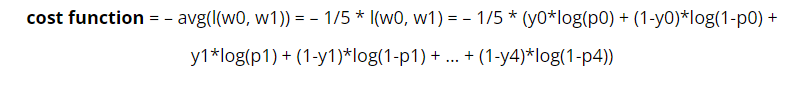

In [1208]:
#Logistic Loss Function
def logloss(y_true,y_pred):
    '''In this function, we will compute log loss '''
    computed_loss = 0
    for idx in range(len(y_true)):
        computed_loss += y_true[idx] * np.log10(y_pred[idx]) + (1-y_true[idx]) * np.log10(1-y_pred[idx])
    loss = (-1)*computed_loss/len(y_true)
    return loss

https://en.wikipedia.org/wiki/Gradient_descent

https://en.wikipedia.org/wiki/Stochastic_gradient_descent

https://github.com/UserSaiVarma/Logistic-Regression-using-Gradient-Descent-without-Sklearn/blob/main/Derivation%20of%20Logistic%20Regression.pdf

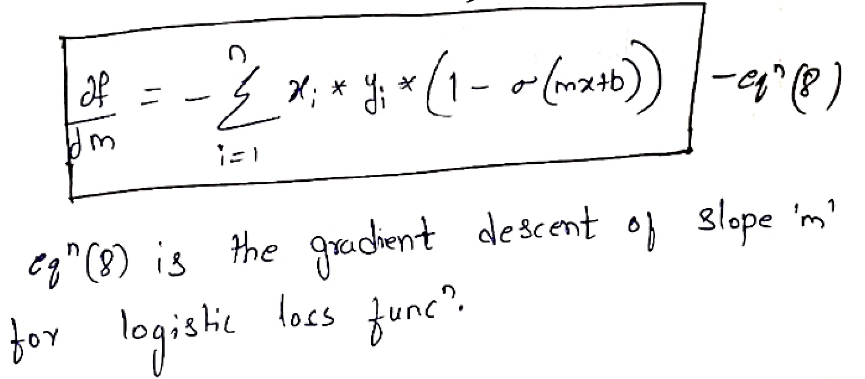

In [1209]:
#Compute gradient w.r.to 'w'
def gradient_dw(x,y,w,b):
    '''In this function, we will compute the gardient w.r.to w '''
    z = np.dot(w,x)+b
    dw = -x * y*(1-sigmoid(z))
    return dw

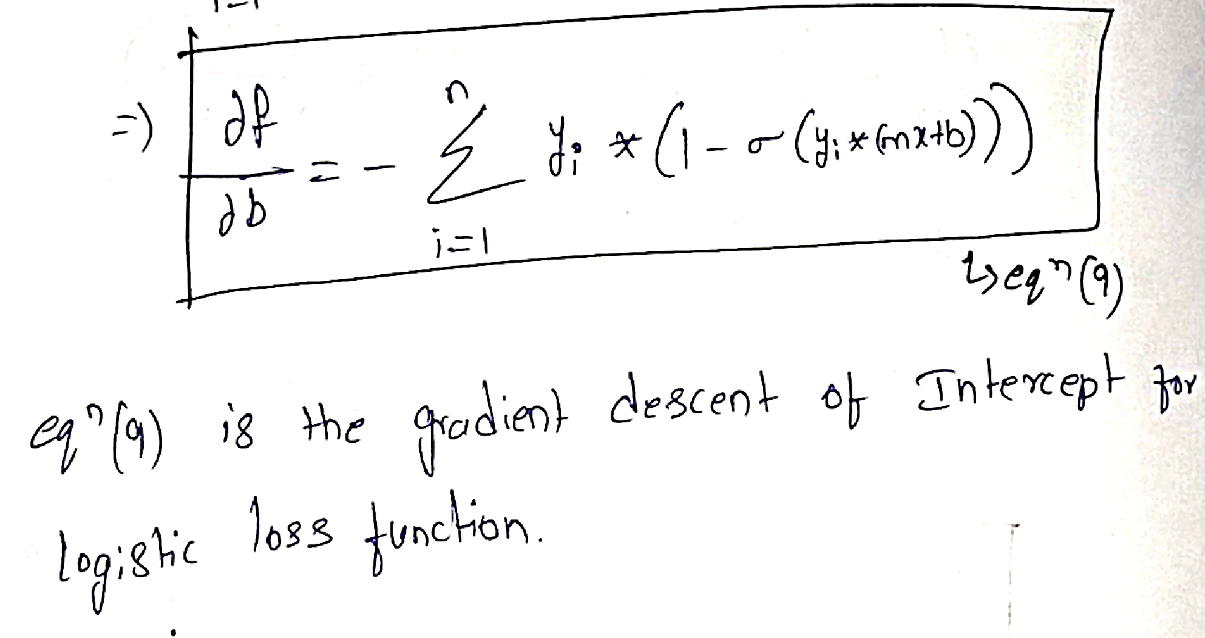

In [1210]:
#Compute gradient w.r.to 'b'
def gradient_db(x,y,w,b):
    '''In this function, we will compute gradient w.r.to b '''
    z = np.dot(w, x) + b
    db = -y*(1 - sigmoid(z))
    return db

In [1211]:
#Computing Predicted probability
def pred(X, w, b):
    N = len(X)
    predict = []
    for i in range(N):
        z=np.dot(w,X[i])+b
        predict.append(sigmoid(z))
    return np.array(predict)

In [1212]:
#Implementing Logistic Regression with Gradient Descent
def GDLogisticRegression(x,y,epochs,eta0):
    ''' In this function, we will implement logistic regression'''
     #Initialzing weights
    w, b = initialize_weights(x[0])
    
    #Creating empty lists to store the loss, slope and intercept values for each epoch
    loss_values = []
    w_values = []
    b_values = []
    
    for epoch in range(epochs):#Loop runs for no. of epochs
        dw = 0
        db = 0
        for idx in range(len(x)): # for each datapoint
            
            #Calculating Gradient Descent for slope 
            dw += gradient_dw(x[idx], y[idx], w, b)
            #Calculating Gradient Descent for Intercept
            db += gradient_db(x[idx], y[idx], w, b)
            
        #updating the slope value
        w = w - eta0 * dw/len(x)

        #updating the intercept value
        b = b - eta0 * db/len(x)

        #appending values to the list
        w_values.append(w)
        b_values.append(b)
        
        #Predicting target variable for Train data and computing loss for the same.
        y_pred = pred(x, w, b) #Return a prediction, size len(x), list from data for only this epoch
        loss_epoch = logloss(y,y_pred) # Sends the predction list, and return the lost, size 1x1
        loss_values.append(loss_epoch) #Appending to the list
       
        print(f"epoch{epoch}: loss = {loss_epoch}")        
        
    return w_values, b_values, loss_values

Adapting the data for be used

In [1213]:
#creating new dataframes x and x_cp
y= np.array(y_kmeans2)
#x= np.array(data[["Fare","Age"]])
x= np.array(data)
x_cp = x.copy()
'''
#inverting the df
for i in range (len(data[["Fare","Age"]])):
  x[i][0], x[i][1] =x[i][1], x[i][0]

df1 = pd.DataFrame(x_cp)
df2 = pd.DataFrame(y_kmeans2)
df = df1.copy()
df[2] = df2
df.rename(columns={0:'Input1',1:'Input2',2:'Class'},inplace=True)
''' 
print(x[0])
 
#Standardization
#for c in [data.columns.get_loc('Pclass'),	data.columns.get_loc('Age'),	data.columns.get_loc('SibSp'),	data.columns.get_loc('Parch'),	data.columns.get_loc('Fare'),	data.columns.get_loc('Title')]:
for c in range(7):
  for i in range(len(x)):
    #x[i][c] = (x[i][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())
    #people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())
    std = np.std(x_cp[:,c])
    mean = np.mean(x_cp[:,c])
    #x = people[person_number][c]
    Standardization = (x[i][c]-mean)/std
    x[i][c] = Standardization
    #people[person_number][c] = Standardization


[ 3.  0. 22. ...  0.  0.  1.]


Here starts the Logistic Regression

In [1214]:
#Calling the function
eta0=0.025 #Learning rate
epochs= 500 #No. of iterations

w_values, b_values, loss_values = GDLogisticRegression(x,y,epochs,eta0)

epoch0: loss = 0.2972111586381335
epoch1: loss = 0.2934705706241677
epoch2: loss = 0.2898066148251901
epoch3: loss = 0.286217692901687
epoch4: loss = 0.28270222604462447
epoch5: loss = 0.27925865594089844
epoch6: loss = 0.27588544563567236
epoch7: loss = 0.27258108029622585
epoch8: loss = 0.26934406788204807
epoch9: loss = 0.26617293972592265
epoch10: loss = 0.2630662510307766
epoch11: loss = 0.2600225812870252
epoch12: loss = 0.25704053461510096
epoch13: loss = 0.2541187400377759
epoch14: loss = 0.25125585168678566
epoch15: loss = 0.24845054894815688
epoch16: loss = 0.24570153655050808
epoch17: loss = 0.24300754460044519
epoch18: loss = 0.24036732856904933
epoch19: loss = 0.23777966923325985
epoch20: loss = 0.23524337257582836
epoch21: loss = 0.23275726964733368
epoch22: loss = 0.23032021639359487
epoch23: loss = 0.22793109345163012
epoch24: loss = 0.2255888059171718
epoch25: loss = 0.22329228308656493
epoch26: loss = 0.22104047817570432
epoch27: loss = 0.21883236801854072
epoch28: lo

From the function GDLogisticRegression gets the variables w_values, b_values and loss_values for the best values for slope and Intercept

In [1215]:
#Getting the best values for slope and Intercept
w_opt = 0
b_opt = 0
'''
for idx in range(1, len(loss_values)):
    loss_diff = loss_values[idx-1] - loss_values[idx]
    
    if loss_diff < 0.0001 : # checking if the loss values are improved
        print('for epoch {} - Minimun loss: {}'.format(idx, loss_values[idx]))
        w_opt = w_values[idx-1]
        b_opt = b_values[idx-1]
        break # Terminating the loop if there is no improvment in the loss
    else:
        continue
print("Best slope: ", w_opt)
print("Best intercept: ", b_opt)
'''
count = 0
indice = 0
temp_loss_values = 2*loss_values[count]
#search the lowerest loss value
for temp in loss_values:

  if loss_values[count] < temp_loss_values:
    temp_loss_values = loss_values[count]
    w_opt = w_values[count]
    b_opt = b_values[count]
    indice = count
  count+=1


print('for epoch {} - Minimun loss: {}'.format(indice, loss_values[indice]))
print("Best slope: ", w_opt)
print("Best intercept: ", b_opt)

for epoch 499 - Minimun loss: 0.07249956494848372
Best slope:  [0.05486536 0.00824865 0.01155233 ... 0.40011669 0.21769218 1.18441386]
Best intercept:  1.8101418028044705


Predicting

In [1216]:

#people=[]
#people.append([1,1,50,1,1,500,2,0,0,1])
#people.append([3,0,20,0,0,5,7,0,1,0])
people=[]
people = data.copy()
for person_number in range(len(people)):
  #standarizating
  #for c in [data.columns.get_loc('Pclass'),	data.columns.get_loc('Age'),	data.columns.get_loc('SibSp'),	data.columns.get_loc('Parch'),	data.columns.get_loc('Fare'),	data.columns.get_loc('Title')]:
  for c in range(7):
      #print(c , ' --- ' ,people[person_number][c])
      #people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())
      std = np.std(x_cp[:,c])
      mean = np.mean(x_cp[:,c])
      #x = people[person_number][c]
      Standardization = (people.iloc[person_number,c]-mean)/std
      people.iloc[person_number,c] = Standardization
      #people[person_number][c] = Standardization

'''   
for person_number in range(len(people)):
  #normalizating
  for c in [data.columns.get_loc('Pclass'),	data.columns.get_loc('Age'),	data.columns.get_loc('SibSp'),	data.columns.get_loc('Parch'),	data.columns.get_loc('Fare'),	data.columns.get_loc('Title')]:
      people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())
'''

chance = pred(np.array(people),w_opt,b_opt)

for i in range(len(chance)):
  print("index: {} probability: {:.2%}".format(i,chance[i]))
#print(chance)
#print(people)

index: 0 probability: 95.97%
index: 1 probability: 87.92%
index: 2 probability: 96.18%
index: 3 probability: 94.63%
index: 4 probability: 95.99%
index: 5 probability: 90.04%
index: 6 probability: 94.34%
index: 7 probability: 95.46%
index: 8 probability: 95.75%
index: 9 probability: 90.57%
index: 10 probability: 95.70%
index: 11 probability: 95.33%
index: 12 probability: 95.94%
index: 13 probability: 94.10%
index: 14 probability: 96.14%
index: 15 probability: 95.93%
index: 16 probability: 88.45%
index: 17 probability: 95.59%
index: 18 probability: 96.07%
index: 19 probability: 92.22%
index: 20 probability: 95.29%
index: 21 probability: 95.61%
index: 22 probability: 90.45%
index: 23 probability: 94.70%
index: 24 probability: 95.64%
index: 25 probability: 94.50%
index: 26 probability: 91.62%
index: 27 probability: 81.56%
index: 28 probability: 90.50%
index: 29 probability: 95.98%
index: 30 probability: 90.31%
index: 31 probability: 82.61%
index: 32 probability: 90.51%
index: 33 probabilit

Comparing with sklearn

In [1217]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc2 = StandardScaler()
lgr_sk = x_cp.copy()
lgr_sk[:,:-3] = sc.fit_transform(x_cp[:,:-3])
classifier = LogisticRegression()
classifier.fit(lgr_sk, y_kmeans2)
prediction = classifier.predict(lgr_sk)
prob = classifier.predict_proba(lgr_sk)[:,1]
#np.set_printoptions(threshold=np.inf)
np.set_printoptions(threshold=4)
for i in range(len(prob)):
  print("index: {} probability: {:.2%}".format(i,prob[i]))



index: 0 probability: 100.00%
index: 1 probability: 95.08%
index: 2 probability: 100.00%
index: 3 probability: 99.61%
index: 4 probability: 100.00%
index: 5 probability: 100.00%
index: 6 probability: 99.74%
index: 7 probability: 99.98%
index: 8 probability: 99.99%
index: 9 probability: 99.89%
index: 10 probability: 99.99%
index: 11 probability: 99.97%
index: 12 probability: 100.00%
index: 13 probability: 99.78%
index: 14 probability: 100.00%
index: 15 probability: 99.99%
index: 16 probability: 99.96%
index: 17 probability: 99.99%
index: 18 probability: 100.00%
index: 19 probability: 100.00%
index: 20 probability: 99.98%
index: 21 probability: 99.99%
index: 22 probability: 100.00%
index: 23 probability: 99.90%
index: 24 probability: 99.98%
index: 25 probability: 99.79%
index: 26 probability: 99.99%
index: 27 probability: 0.00%
index: 28 probability: 100.00%
index: 29 probability: 100.00%
index: 30 probability: 99.88%
index: 31 probability: 2.93%
index: 32 probability: 100.00%
index: 33 

In [1218]:
diff = []
for i in range(len(prob)):
  diff.append(chance[i]-prob[i])
  print("Index: {}  Without Sklearn: {}  With Sklearn: {}  difference: {}".format(i,chance[i],prob[i],diff[i]) )


Index: 0  Without Sklearn: 0.9597164607733875  With Sklearn: 0.9999780508521353  difference: -0.040261590078747855
Index: 1  Without Sklearn: 0.8792136900516839  With Sklearn: 0.9507515626274801  difference: -0.07153787257579614
Index: 2  Without Sklearn: 0.9617540857215615  With Sklearn: 0.9999793870755376  difference: -0.03822530135397606
Index: 3  Without Sklearn: 0.9463079864557192  With Sklearn: 0.9961212433096379  difference: -0.049813256853918686
Index: 4  Without Sklearn: 0.9598690502997198  With Sklearn: 0.9999814245783887  difference: -0.04011237427866887
Index: 5  Without Sklearn: 0.9004164746403007  With Sklearn: 0.9999745627308773  difference: -0.09955808809057654
Index: 6  Without Sklearn: 0.9433603567501783  With Sklearn: 0.9973647530778604  difference: -0.05400439632768217
Index: 7  Without Sklearn: 0.9545561135326265  With Sklearn: 0.99982066794533  difference: -0.045264554412703495
Index: 8  Without Sklearn: 0.9575082156761893  With Sklearn: 0.9999178704291461  differ

In [1219]:

print('average Without Sklearn: {:.2%}'.format(np.mean(chance)))
print('average With Sklearn: {:.2%}'.format(np.mean(prob)))
print('average diff: {:.2%}'.format(np.mean(diff)))


average Without Sklearn: 93.25%
average With Sklearn: 94.05%
average diff: -0.80%


In [1220]:

for i in range(len(prob)):
  diff.append(chance[i]-prob[i])
  print('Without Sklearn  With Sklearn -100%: {:.2%} {:.2%}'.format(1-chance[i],1-prob[i]))


Without Sklearn  With Sklearn -100%: 4.03% 0.00%
Without Sklearn  With Sklearn -100%: 12.08% 4.92%
Without Sklearn  With Sklearn -100%: 3.82% 0.00%
Without Sklearn  With Sklearn -100%: 5.37% 0.39%
Without Sklearn  With Sklearn -100%: 4.01% 0.00%
Without Sklearn  With Sklearn -100%: 9.96% 0.00%
Without Sklearn  With Sklearn -100%: 5.66% 0.26%
Without Sklearn  With Sklearn -100%: 4.54% 0.02%
Without Sklearn  With Sklearn -100%: 4.25% 0.01%
Without Sklearn  With Sklearn -100%: 9.43% 0.11%
Without Sklearn  With Sklearn -100%: 4.30% 0.01%
Without Sklearn  With Sklearn -100%: 4.67% 0.03%
Without Sklearn  With Sklearn -100%: 4.06% 0.00%
Without Sklearn  With Sklearn -100%: 5.90% 0.22%
Without Sklearn  With Sklearn -100%: 3.86% 0.00%
Without Sklearn  With Sklearn -100%: 4.07% 0.01%
Without Sklearn  With Sklearn -100%: 11.55% 0.04%
Without Sklearn  With Sklearn -100%: 4.41% 0.01%
Without Sklearn  With Sklearn -100%: 3.93% 0.00%
Without Sklearn  With Sklearn -100%: 7.78% 0.00%
Without Sklearn  W

In [1221]:
data


,Pclass,Sex,Age,SibSp,Parch,Fare,Title,Embarked Cherbourg,Embarked Queenstown,Embarked Southampton
0,3,0,22.000000,1,0,7.2500,7,0,0,1
1,1,1,38.000000,1,0,71.2833,4,1,0,0
2,3,1,26.000000,0,0,7.9250,5,0,0,1
3,1,1,35.000000,1,0,53.1000,4,0,0,1
4,3,0,35.000000,0,0,8.0500,7,0,0,1
...,...,...,...,...,...,...,...,...,...,...
886,2,0,27.000000,0,0,13.0000,2,0,0,1
887,1,1,19.000000,0,0,30.0000,5,0,0,1
888,3,1,21.777778,1,2,23.4500,5,0,0,1
889,1,0,26.000000,0,0,30.0000,7,1,0,0


In [1222]:
#Old one DELETE
# chance to be in cluster 1 or 2

# p = Pclass,	Sex	,Age	,SibSp	,Parch,	Fare	,Title	,Embarked Cherbourg	,Embarked Queenstown,	Embarked Southampton
people=[]
people.append([1,1,50,1,1,500,2,0,0,1])
people.append([3,0,20,0,0,5,7,0,1,0])

#search the probability for every person
for person_number in range(len(people)):
  #normalizating
  for c in [data.columns.get_loc('Pclass'),	data.columns.get_loc('Age'),	data.columns.get_loc('SibSp'),	data.columns.get_loc('Parch'),	data.columns.get_loc('Fare'),	data.columns.get_loc('Title')]:
      people[person_number][c] = (people[person_number][c]-x_cp[:,c].min()) / (x_cp[:,c].max()-x_cp[:,c].min())

  chance = 0
  for i in range(len(people[person_number])):
    chance += w_opt[i]*people[person_number][i]
    
  chance += b_opt
  chance = sigmoid(chance)

  #chance = 1/(1+math.exp(chance))
  #chance = math.exp(chance)/(1+math.exp(chance))
    #chance = sigmoid(b_opt + w_opt[0]*p[0] + w_opt[1]*p[1])
  print('Person number: ', person_number,'   Chance: ',chance)
print(people)

Person number:  0    Chance:  0.9387307699898868
Person number:  1    Chance:  0.8866007475083235
[[0.0, 1, 0.6230208595124404, 0.125, 0.16666666666666666, 0.9759350042902103, 0.0, 0, 0, 1], [1.0, 0, 0.24604171902488062, 0.0, 0.0, 0.009759350042902102, 1.0, 0, 1, 0]]
